# Quantum Simulation

## Theory

We are concerned to find the solution of the Schrodinger Equation : $i \frac{d |\psi \rangle}{dt} = H | \psi \rangle$, which for a time-independent $H$ the solution is:

$$
    | \psi (t) \rangle = e^{- i H t} | \psi (0) \rangle
$$

H is extremely hard to exponentiate, thus we need to find an approximate solution. A good start is to use a first-order approximation $|\psi(t + \Delta t \rangle \approx (I - iH \Delta t) | \psi (0) \rangle$, which is easier to do than exponentiating, therefore we can approximate $(I - i H \Delta t)$ using quantum gates. However, this approximation is not always satisfactory.

Efficient approximations can be obtained for many classes of Hamiltonians up to high order. Many quantum systems can be written as interactions of local Hamiltonians. For a system of $n$ particles, $H = \sum_{k=1}^L H_k$ where each $H_k$ acts on at most a constant number of particles, this restriction leads that $L = poly(n)$. Often $H_k$ are one-body interactions such as $X_j$ or two-body interactions such as $X_j X_l$.

For this kind of Hamiltonian we have that $e^{-i H t}$ is hard to compute, as usual, but $e^{- i H_k t}$ is rather easy since it acts on a smaller sub-system. There is only one problem: In general $e^{-iHt} \neq \prod_k e^{-i H_j t}$ when $[ H_j, H_k] \neq 0$.

Let's show that if $[ H_j, H_k] = 0$, then $e^{-iHt} = \prod_k e^{-i H_k t}$:

$$
    e^{-i H t} = e^{- i \sum_k H_k t}
$$

Using the Zassenhaus formula, we have that $ e^{t ( A + B)} = e^{tA} e^{tB} \prod_{n=2}^\infty e^{t^n Z_n (A,B)}$, where $Z_n (A, B) = \frac{1}{n!} \bigg[ \frac{d}{dt^n} \bigg( e^{-t^{n-1} Z_{n-1}} \dots e^{t^2 Z_2(A, B)} e^{-tB} e^{-tA} e^{t(A+B)} \bigg) \bigg]_{t=0}$. 

Simplifying: $e^{t(A+B)} = e^{tA} e^{tB} e^{-\frac{t^2}{2}[A,B]} e^{\frac{t^3}{3!} ( 2 [B, [A,B]] + [A, [A,B]])} \dots$. Thus we have that:

$$
\begin{split}
    e^{-i H t} & = e^{- i t (H_1 + \sum_{k=2}^L H_k} = e^{- i t H_1} e^{- i t \sum_k H_k} e^{-\frac{t^2}{2}[H_1,\sum_k H_k]} \dots \\
     & = e^{-it H_1} e^{-i t \sum_k H_k} = \dots = \prod_{k=1}^L e^{-i t H_k}
\end{split}
$$

We can also show that the restriction of $H_k$ to involve at most a constant number of particles, $c$, implies that we have a polynomial amount of terms, precisely $L$ is upper-bounded by a polynomial in $n$.

$$
\begin{split}
    \text{#  of  terms} & \leq \text{#  of  cosets  of  n  that  has  the  size  at  most  c} \\
    L & \leq \binom{n}{1} + \binom{n}{2} + \dots + \binom{n}{c} \\
      & \leq c \binom{n}{c} \leq \frac{n^c}{(c-1)!} \\ 
      & \Rightarrow L \leq poly(c)
\end{split}
$$

The main algorithm for quantum simulation uses the Trotter Formula:

**Trotter Formula**: Let A, and B be Hermitian operators. Then for any real $t$:

$$
    \lim_{n\rightarrow \infty} ( e^{\frac{i A t}{n}} e^{\frac{i B t}{n}})^n = e^{i(A + B) t}
$$


Proof: By definition: $e^{\frac{i A t}{n}} = I + \frac{1}{n} i A t + O \big( \frac{1}{n^2} \big)$, and thus:

$$
    e^{\frac{i A t}{n}} e^{\frac{i B t}{n}} = I + \frac{1}{n} i (A + B) t + O \bigg( \frac{1}{n^2} \bigg)
$$

Thus:

$$
    ( e^{\frac{i A t}{n}} e^{\frac{i B t}{n}})^n = I  + \sum_{k=1}^n \binom{n}{k} \frac{1}{n^k} \big[ i (A + B) t \big]^k + O \bigg( \frac{1}{n} \bigg)
$$

Since $\binom{n}{k} \frac{1}{n^k} = \frac{1 + O(\frac{1}{n})}{k!}$, this gives:

$$
    \lim_{n \rightarrow \infty} (e^{\frac{i A t}{n}} e^{\frac{i B t}{n}})^n = \lim_{n \rightarrow \infty} \sum_{k=0}^n \frac{(i (A+B) t)^k}{k!} \bigg( 1 + O \bigg( \frac{1}{n} \bigg) \bigg) + O \bigg( \frac{1}{n} \bigg) = e^{i(A+B)t}
$$

We can also prove the following statements:

$$
    e^{i(A+B) \Delta t} = e^{iA \Delta t} e^{iB \Delta t} + O ( \Delta t^2) \ \ \ \ \ e^{i (A + B) \Delta t} = e^{iA \Delta t / 2} e^{iB \Delta t} e^{iA \Delta t / 2} + O( \Delta t^3)
$$

## Simple example

Let's see a class of Hamiltonians that can be expressed efficiently into a quantum circuit. Suppose that we have the following Hamiltonian:

$$
    H = Z_1 \otimes Z_2 \otimes \dots \otimes Z_n
$$

Which acts on a n-qubit system. How can we simulate $e^{-iH\Delta t}$ efficiently?

First, let's suppose that $n=2$ and see the action of the $Z \otimes Z = ZZ$ operator in the computational basis:

$$
\begin{split}
    ZZ | 00 \rangle = | 00 \rangle \ \ \ \ \ \ \ ZZ | 10 \rangle = - | 10 \rangle \\
    ZZ | 01 \rangle = - | 01 \rangle \ \ \ \ \ \ \ ZZ | 11 \rangle = | 11 \rangle \\
\end{split}
$$

Thus the exponentiation of $ZZ$ can be computed using the parity and one rotation along the $Z$ axis. Let's show how this works in `qiskit`, for this we would use the [qiskit.opflow](https://qiskit.org/documentation/apidoc/opflow.html).

In [72]:
# Let's import all functions
import numpy as np
import scipy as sp
from qiskit import Aer
from qiskit.opflow import PauliTrotterEvolution, StateFn, PauliExpectation
from qiskit.opflow import CircuitSampler, PauliOp
from qiskit.opflow import I, X, Y, Z, Zero, One, Plus, Minus
from qiskit.circuit import Parameter

We can define a Pauli matrix hamiltonian using simple notation:

In [7]:
hamiltonian = (Z^Z)

Where `^` represents the tensor product.

In [5]:
evo_time = Parameter('t')
evolution_op = (evo_time*hamiltonian).exp_i()
print(evolution_op) 

e^(-i*1.0*t * ZZ)


Let's convert this evolution operator into a circuit using Trotter Expansion:

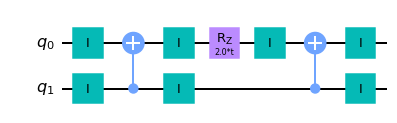

In [14]:
num_time_slices = 1
trotterized_op = PauliTrotterEvolution(
                    trotter_mode='trotter', 
                    reps=num_time_slices).convert(evolution_op)
trotterized_op.to_circuit().draw()

We can calculate $XX$ or $YY$, using $X = HZX$ and $Y = (H S^\dagger)^\dagger Z (H S^\dagger)$ in order to make a change of basis. Let's show this using qiskit:

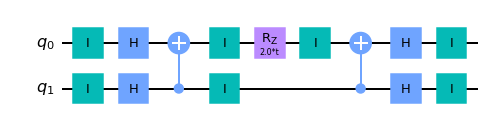

In [15]:
hamiltonian = (X^X)
evo_time = Parameter('t')
evolution_op = (evo_time*hamiltonian).exp_i()
num_time_slices = 1
trotterized_op = PauliTrotterEvolution(
                    trotter_mode='trotter', 
                    reps=num_time_slices).convert(evolution_op)
trotterized_op.to_circuit().draw()

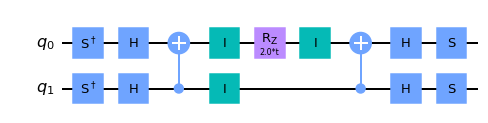

In [34]:
hamiltonian = (Y^Y)
evo_time = Parameter('t')
evolution_op = (evo_time*hamiltonian).exp_i()
num_time_slices = 1
trotterized_op = PauliTrotterEvolution(
                    trotter_mode='trotter', 
                    reps=num_time_slices).convert(evolution_op)
trotterized_op.to_circuit().draw()

This can be extended for an arbitrary number of qubits! Thus, we apply the phase-shift $e^{- i\Delta t}$ if the parity of the $n$ qubits in the computational basis is even; otherwise, the phase-shift should be $e^{i \Delta t}$. Therefore, we can efficiently simulate this kind of Hamiltonian into a Quantum Circuit by storing the parity in a auxiliary qubit and apply the phase-shift conditioned on the parity, then uncomputing the parity (to erase the auxiliary qubit). Let's show one example:

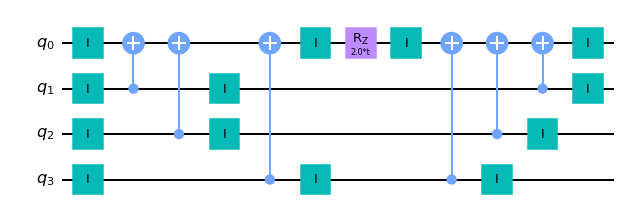

In [17]:
hamiltonian = (Z^Z^Z^Z)
evo_time = Parameter('t')
evolution_op = (evo_time*hamiltonian).exp_i()
num_time_slices = 1
trotterized_op = PauliTrotterEvolution(
                    trotter_mode='trotter', 
                    reps=num_time_slices).convert(evolution_op)
trotterized_op.to_circuit().draw()

## End-to-end simulation

After this introduction, we can show how to implement an end-to-end simulation of a simple hamiltonian and how we can measure it in real quantum computers.

Let's define a simple hamiltonian, such as $H = ZZ + XX$ and measure an observable such as $ O = XX $.

In [43]:
hamiltonian = (Z^Z) + (X^X)
observable = (X^X)
evo_time = Parameter('t')
evolution_op = (evo_time*hamiltonian).exp_i()

We can convert the observable into a state function using the `StateFn` and transform into an measurement using the `.adjoint()` method.

In [44]:
observable_measurement = StateFn(observable).adjoint()

Let's define an initial state that is an eigenvalue of the Hamiltonian:

In [32]:
eigenvalues, eigenstates = np.linalg.eigh(hamiltonian.to_matrix())
initial_state = StateFn(eigenstates[0])
print(initial_state.to_circuit_op())

CircuitStateFn(
     ┌────────────────────────────────────┐
q_0: ┤0                                   ├
     │  initialize(0,-0.70711,0,-0.70711) │
q_1: ┤1                                   ├
     └────────────────────────────────────┘
) * 0.9999999999999999


Using the operator flow, we can easily combine circuits, thus what is represented by the following equation:

$$
\langle O \rangle = \langle \psi(t) | O | \psi(t) \rangle
$$

Can be represented by the following line:

In [59]:
evo_and_measure = observable_measurement @ evolution_op @ initial_state
print(evo_and_measure)

ComposedOp([
  OperatorMeasurement(XX),
  e^(-i*1.0*t * (
    1.0 * ZZ
    + 1.0 * XX
  )),
  VectorStateFn(Statevector([ 0.        +0.j, -0.70710678+0.j,  0.        +0.j,
               -0.70710678+0.j],
              dims=(2, 2)))
])


Now we can convert our hamiltonian simulation using the PauliTrotter evolution:

In [65]:
num_time_slices = 1
trotterized_op = PauliTrotterEvolution(
                    trotter_mode='trotter', 
                    reps=num_time_slices).convert(evo_and_measure)
print(trotterized_op)

ComposedOp([
  OperatorMeasurement(XX),
  global phase: 0
       ┌───┐┌───┐┌───────────┐┌───┐┌───┐┌───┐┌───────────┐┌───┐
  q_0: ┤ H ├┤ X ├┤ RZ(2.0*t) ├┤ X ├┤ H ├┤ X ├┤ RZ(2.0*t) ├┤ X ├
       ├───┤└─┬─┘└───────────┘└─┬─┘├───┤└─┬─┘└───────────┘└─┬─┘
  q_1: ┤ H ├──■─────────────────■──┤ H ├──■─────────────────■──
       └───┘                       └───┘                       ,
  VectorStateFn(Statevector([ 0.        +0.j, -0.70710678+0.j,  0.        +0.j,
               -0.70710678+0.j],
              dims=(2, 2)))
])


Now we need to convert our circuit in order to measure in a real quantum computer, this is done by using `PauliExpectation()`.

In [67]:
# Let's calculate expectation values
diagonalized_meas_op = PauliExpectation().convert(trotterized_op)
print(diagonalized_meas_op)

ComposedOp([
  OperatorMeasurement(ZZ),
  global phase: 0
       ┌───┐┌───┐┌───────────┐┌───┐┌───┐┌───┐┌───────────┐┌───┐┌───┐
  q_0: ┤ H ├┤ X ├┤ RZ(2.0*t) ├┤ X ├┤ H ├┤ X ├┤ RZ(2.0*t) ├┤ X ├┤ H ├
       ├───┤└─┬─┘└───────────┘└─┬─┘├───┤└─┬─┘└───────────┘└─┬─┘├───┤
  q_1: ┤ H ├──■─────────────────■──┤ H ├──■─────────────────■──┤ H ├
       └───┘                       └───┘                       └───┘,
  VectorStateFn(Statevector([ 0.        +0.j, -0.70710678+0.j,  0.        +0.j,
               -0.70710678+0.j],
              dims=(2, 2)))
])


Now we can get the expected value of the observable using the `.eval()` method for times `evo_time_points`. 

This will run our hamiltonian simulation on an ideal quantum computer.

In [82]:
evo_time_points = [0.5, 0.75]
hamiltonian_trotter_expectations = diagonalized_meas_op.bind_parameters({evo_time: evo_time_points})
print(f"Observable at time {evo_time_points}: {np.round(hamiltonian_trotter_expectations.eval(), 3)}")

Observable at time [0.5, 0.75]: [0.+0.j 0.+0.j]


Even though this works, this is not how we would run on real quantum computers, for this we sould convert our operator flow program using `CircuitSampler` and choose a backend to run it. 


In [83]:
sampler = CircuitSampler(backend=Aer.get_backend("qasm_simulator"))
# sampler.quantum_instance.run_config.shots = 1000
sampled_trotter_exp_op = sampler.convert(hamiltonian_trotter_expectations)
sampled_trotter_energies = sampled_trotter_exp_op.eval()
print(f"Energies: {np.round(np.real(sampled_trotter_energies),3)}")

Energies: [ 0.055 -0.02 ]


Running on the `qasm_simulator` leads to statistical error associated to the number of shots, which can be seen on the folowing plot.

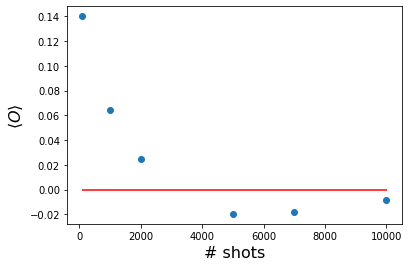

In [117]:
import matplotlib.pyplot as plt

def run_hs(shots):
    sampler = CircuitSampler(backend=Aer.get_backend("qasm_simulator"))
    sampler.quantum_instance.run_config.shots = shots
    hamiltonian_trotter_expectations = diagonalized_meas_op.bind_parameters({evo_time: 0.5})
    sampled_trotter_exp_op = sampler.convert(hamiltonian_trotter_expectations)
    sampled_trotter_energies = sampled_trotter_exp_op.eval()
    return np.real(sampled_trotter_energies)

n_shots = [100, 1000, 2000, 5000, 7000, 10000]
exp = []
for shots in n_shots:
    exp.append(run_hs(shots))

plt.plot(n_shots, exp, 'o', label=f"t={0.5}")
plt.hlines(y=0., xmin=min(n_shots), xmax=max(n_shots) + 1, colors='red')
plt.xlabel("# shots", size=16)
plt.ylabel(r"$ \langle O \rangle $", size=16)
plt.show()

# References

- Nielsen, Michael A., and Isaac Chuang. "Quantum computation and quantum information." (2002): 558-559.
- [Operator Flow Tutorial](https://qiskit.org/documentation/tutorials/operators/01_operator_flow.html).